# 준비

## konlpy wordcloud 설치

In [1]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 13.2MB/s 
     |████████████████████████████████| 450kB 43.7MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## 폰트 설치(윈도우)

In [2]:
# 코랩에서 한글 표기를 위해 폰트 설치(윈도우)_실행 후 런타임 초기화 및 다시 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,148 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# 데이터 로드

In [4]:
#1 데이터 불러오기
data = pd.read_table('/content/nsrd.txt')
data.head()

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1


# 명사단어 추출 과정

In [5]:
twitter = Okt()     # 세종사전 실행 코드

In [6]:
data1 = data.dropna(axis = 0)

In [7]:
word_list = []      # 단어 리스트 만드는 함수
word_list = data1['reviews']

In [8]:
sentences_tag = []  # 형태소 분리하는 함수

for sentence in word_list:
  morph = twitter.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('아직', 'Adverb'), ('사용', 'Noun'), ('해보지도', 'Verb'), ('않았고', 'Verb'), ('다른', 'Noun'), ('제품', 'Noun'), ('을', 'Josa'), ('써', 'Verb'), ('본적', 'Noun'), ('이', 'Josa'), ('없어서', 'Adjective'), ('잘', 'Verb'), ('모르겠지만', 'Verb'), ('ㅎㅎ', 'KoreanParticle'), ('배송', 'Noun'), ('은', 'Josa'), ('빨랐습니다', 'Adjective')]


In [9]:
# 명사만 추출하기
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [10]:
# konlpy: 형태소 분석을 통해 본문에서 명사추출
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]    # 1글자는 단어는 삭제
noun_list[:100]

['배공',
 '택배',
 '엉망',
 '아주',
 '바지',
 '정말',
 '구매',
 '가격',
 '대박',
 '바느질',
 '조금',
 '가성',
 '최고',
 '선물',
 '전달',
 '상품',
 '머그컵',
 '당황',
 '바로',
 '배송',
 '누락',
 '확인',
 '바로',
 '선물',
 '큰일',
 '배송',
 '다시',
 '생각',
 '민트',
 '색상',
 '손잡이',
 '도로',
 '사용',
 '계란',
 '완전',
 '코팅',
 '보기',
 '실용',
 '생각',
 '진짜',
 '별로',
 '주문',
 '배송',
 '여기',
 '회사',
 '전화',
 '연락',
 '추천',
 '길이',
 '주문',
 '별로',
 '보폴',
 '계속',
 '지금',
 '안나',
 '전문',
 '속옷',
 '브랜드',
 '위생',
 '팬티',
 '밴딩부분',
 '신축',
 '일반',
 '실로',
 '빅사',
 '빅사',
 '이즈',
 '밴딩부분',
 '밴딩',
 '사이즈',
 '베이지',
 '구매',
 '약간',
 '살색',
 '화면',
 '컬러',
 '그냥',
 '별루',
 '탛캏타',
 '촉감',
 '무게',
 '사이즈',
 '친구',
 '실내',
 '하나',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '가성',
 '바퀴',
 '고정',
 '린데',
 '화장',
 '거품',
 '생기',
 '정력']

In [21]:
# Counter: 단어수 세기, 가장 많이 등장한 단어(명사) 추출
counts = Counter(noun_list)
tags = counts.most_common(50)
tags

[('배송', 28481),
 ('구매', 15622),
 ('사용', 13670),
 ('제품', 12042),
 ('가격', 11590),
 ('그냥', 11538),
 ('생각', 11278),
 ('주문', 9894),
 ('별로', 8035),
 ('사이즈', 7649),
 ('포장', 7130),
 ('상품', 6054),
 ('냄새', 5533),
 ('정말', 5484),
 ('부분', 5400),
 ('하나', 4770),
 ('아주', 4712),
 ('진짜', 4635),
 ('구입', 4338),
 ('조금', 4333),
 ('반품', 4186),
 ('아이', 4013),
 ('느낌', 3887),
 ('정도', 3824),
 ('완전', 3778),
 ('처음', 3380),
 ('디자인', 3287),
 ('사진', 3271),
 ('효과', 3204),
 ('다시', 3174),
 ('상태', 3139),
 ('선물', 3125),
 ('대비', 3048),
 ('한번', 3045),
 ('추천', 3043),
 ('보고', 3014),
 ('크기', 2955),
 ('색상', 2942),
 ('다른', 2885),
 ('교환', 2748),
 ('계속', 2621),
 ('마음', 2578),
 ('물건', 2577),
 ('가성', 2533),
 ('다음', 2509),
 ('바로', 2453),
 ('항상', 2398),
 ('박스', 2384),
 ('설치', 2322),
 ('실망', 2320)]

# 워드클라우드 생성하기

{'배송': 28481, '구매': 15622, '사용': 13670, '제품': 12042, '가격': 11590, '그냥': 11538, '생각': 11278, '주문': 9894, '별로': 8035, '사이즈': 7649, '포장': 7130, '상품': 6054, '냄새': 5533, '정말': 5484, '부분': 5400, '하나': 4770, '아주': 4712, '진짜': 4635, '구입': 4338, '조금': 4333, '반품': 4186, '아이': 4013, '느낌': 3887, '정도': 3824, '완전': 3778, '처음': 3380, '디자인': 3287, '사진': 3271, '효과': 3204, '다시': 3174, '상태': 3139, '선물': 3125, '대비': 3048, '한번': 3045, '추천': 3043, '보고': 3014, '크기': 2955, '색상': 2942, '다른': 2885, '교환': 2748, '계속': 2621, '마음': 2578, '물건': 2577, '가성': 2533, '다음': 2509, '바로': 2453, '항상': 2398, '박스': 2384, '설치': 2322, '실망': 2320}


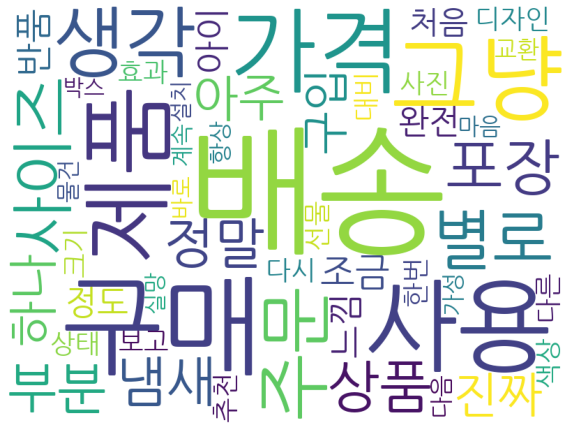

In [22]:
# WordCloud, matplotlib: 워드클라우드 생성하기
font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
wc = WordCloud(font_path=font_path, background_color = 'white', width=800, height=600)
print(dict(tags))

cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()